In [1]:
import pandas as pd

In [2]:
import_file = 'sample_auto02.xlsx'

In [3]:
excel_sheetname01 = '社員マスタ'
excel_sheetname02 = '予算管理表'
excel_sheetname03 = '実績管理表'
excel_sheetname04 = '実績管理表社員ID未記入'

In [4]:
df_employee_master = pd.read_excel(import_file,sheet_name=excel_sheetname01)

In [5]:
df_employee_master.head()

,社員番号,氏名,所属支店,性別
0,a001,辻上 明佳,東京,女
1,a002,押元 大成,横浜,男
2,a003,石崎 和香菜,東京,女
3,a004,斉 あきの,大阪,女
4,a005,寺下 春樹,札幌,男


In [6]:
df_budget = pd.read_excel(import_file,sheet_name = excel_sheetname02)

In [7]:
df_budget.head()

,社員番号,売上予算
0,a001,40000
1,a002,48000
2,a003,39000
3,a004,43000
4,a005,38000


In [8]:
df_actual = pd.read_excel(import_file,sheet_name = excel_sheetname03)

In [9]:
df_actual.head(5)

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020-01-04,a023,河野 利香,女,ボトムス,ロングパンツ,7000,8,56000,NaN,NaN,NaN,NaN
1,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
2,2020-01-05,a052,井上 真,女,アウター,ジャケット,10000,7,70000,NaN,NaN,NaN,NaN
3,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
4,2020-01-07,a036,西尾 謙,男,ボトムス,ロングパンツ,7000,2,14000,NaN,NaN,NaN,NaN


In [10]:
pd.merge(df_employee_master, df_budget, on='社員番号').head()

,社員番号,氏名,所属支店,性別,売上予算
0,a001,辻上 明佳,東京,女,40000
1,a002,押元 大成,横浜,男,48000
2,a003,石崎 和香菜,東京,女,39000
3,a004,斉 あきの,大阪,女,43000
4,a005,寺下 春樹,札幌,男,38000


In [11]:
pd.merge(df_employee_master, df_actual, left_on='社員番号',right_on='社員ID').head() #merge →Vlookup関数と同じ役割

,社員番号,氏名_x,所属支店,性別_x,売上日,社員ID,氏名_y,性別_y,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,a003,石崎 和香菜,東京,女,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
1,a003,石崎 和香菜,東京,女,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
2,a003,石崎 和香菜,東京,女,2020-01-19,a003,石崎 和香菜,女,トップス,シャツ,4000,1,4000,NaN,NaN,NaN,NaN
3,a003,石崎 和香菜,東京,女,2020-01-21,a003,石崎 和香菜,女,アウター,ダウン,18000,1,18000,NaN,NaN,NaN,NaN
4,a003,石崎 和香菜,東京,女,2020-01-24,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,6,42000,NaN,NaN,NaN,NaN


In [12]:
pd.merge(df_employee_master,df_actual,left_on=['氏名','性別'],right_on=['氏名','性別']).head(5)

,社員番号,氏名,所属支店,性別,売上日,社員ID,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,a003,石崎 和香菜,東京,女,2020-01-05,a003,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
1,a003,石崎 和香菜,東京,女,2020-01-06,a003,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
2,a003,石崎 和香菜,東京,女,2020-01-19,a003,トップス,シャツ,4000,1,4000,NaN,NaN,NaN,NaN
3,a003,石崎 和香菜,東京,女,2020-01-21,a003,アウター,ダウン,18000,1,18000,NaN,NaN,NaN,NaN
4,a003,石崎 和香菜,東京,女,2020-01-24,a003,ボトムス,ロングパンツ,7000,6,42000,NaN,NaN,NaN,NaN


In [13]:
df_employee_actual = pd.merge(df_employee_master , df_actual, left_on='社員番号',right_on='社員ID')

In [14]:
df_employee_actual

,社員番号,氏名_x,所属支店,性別_x,売上日,社員ID,氏名_y,性別_y,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,a003,石崎 和香菜,東京,女,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
1,a003,石崎 和香菜,東京,女,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
2,a003,石崎 和香菜,東京,女,2020-01-19,a003,石崎 和香菜,女,トップス,シャツ,4000,1,4000,NaN,NaN,NaN,NaN
3,a003,石崎 和香菜,東京,女,2020-01-21,a003,石崎 和香菜,女,アウター,ダウン,18000,1,18000,NaN,NaN,NaN,NaN
4,a003,石崎 和香菜,東京,女,2020-01-24,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,6,42000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,a052,井上 真,女,トップス,シャツ,4000,5,20000,NaN,NaN,NaN,NaN
220,a052,井上 真,東京,女,2020-09-01,a052,井上 真,女,ボトムス,ロングパンツ,7000,5,35000,NaN,NaN,NaN,NaN
221,a052,井上 真,東京,女,2020-09-11,a052,井上 真,女,トップス,シャツ,4000,2,8000,NaN,NaN,NaN,NaN
222,a052,井上 真,東京,女,2020-11-10,a052,井上 真,女,トップス,シャツ,4000,2,8000,NaN,NaN,NaN,NaN


In [15]:
df_employee_actual = df_employee_actual.drop(['氏名_y','性別_y','社員ID'],axis=1)

In [16]:
df_employee_actual

,社員番号,氏名_x,所属支店,性別_x,売上日,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,a003,石崎 和香菜,東京,女,2020-01-05,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
1,a003,石崎 和香菜,東京,女,2020-01-06,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
2,a003,石崎 和香菜,東京,女,2020-01-19,トップス,シャツ,4000,1,4000,NaN,NaN,NaN,NaN
3,a003,石崎 和香菜,東京,女,2020-01-21,アウター,ダウン,18000,1,18000,NaN,NaN,NaN,NaN
4,a003,石崎 和香菜,東京,女,2020-01-24,ボトムス,ロングパンツ,7000,6,42000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,トップス,シャツ,4000,5,20000,NaN,NaN,NaN,NaN
220,a052,井上 真,東京,女,2020-09-01,ボトムス,ロングパンツ,7000,5,35000,NaN,NaN,NaN,NaN
221,a052,井上 真,東京,女,2020-09-11,トップス,シャツ,4000,2,8000,NaN,NaN,NaN,NaN
222,a052,井上 真,東京,女,2020-11-10,トップス,シャツ,4000,2,8000,NaN,NaN,NaN,NaN


In [17]:
df_employee_actual = df_employee_actual.rename(columns={'氏名_x':'氏名','性別_x':'性別'})

In [18]:
df_employee_actual

,社員番号,氏名,所属支店,性別,売上日,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,a003,石崎 和香菜,東京,女,2020-01-05,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
1,a003,石崎 和香菜,東京,女,2020-01-06,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
2,a003,石崎 和香菜,東京,女,2020-01-19,トップス,シャツ,4000,1,4000,NaN,NaN,NaN,NaN
3,a003,石崎 和香菜,東京,女,2020-01-21,アウター,ダウン,18000,1,18000,NaN,NaN,NaN,NaN
4,a003,石崎 和香菜,東京,女,2020-01-24,ボトムス,ロングパンツ,7000,6,42000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,トップス,シャツ,4000,5,20000,NaN,NaN,NaN,NaN
220,a052,井上 真,東京,女,2020-09-01,ボトムス,ロングパンツ,7000,5,35000,NaN,NaN,NaN,NaN
221,a052,井上 真,東京,女,2020-09-11,トップス,シャツ,4000,2,8000,NaN,NaN,NaN,NaN
222,a052,井上 真,東京,女,2020-11-10,トップス,シャツ,4000,2,8000,NaN,NaN,NaN,NaN


In [19]:
#ピポットテーブルで合計
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc='sum') 

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,636000,296000,416000
井上 真,560000,200000,176000
宮瀬 尚紀,464000,340000,883000
河野 利香,918000,424000,458000
石崎 和香菜,1022000,564000,883000
西尾 謙,786000,292000,361000


In [20]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc='mean') 

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,106000.000000,42285.714286,29714.285714
井上 真,70000.000000,25000.000000,22000.000000
宮瀬 尚紀,77333.333333,42500.000000,35320.000000
河野 利香,76500.000000,35333.333333,26941.176471
石崎 和香菜,63875.000000,37600.000000,31535.714286
西尾 謙,78600.000000,26545.454545,27769.230769


In [21]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc='sum').astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,636000,296000,416000
井上 真,560000,200000,176000
宮瀬 尚紀,464000,340000,883000
河野 利香,918000,424000,458000
石崎 和香菜,1022000,564000,883000
西尾 謙,786000,292000,361000


In [22]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc='count') 

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,6,7,14
井上 真,8,8,8
宮瀬 尚紀,6,8,25
河野 利香,12,12,17
石崎 和香菜,16,15,28
西尾 謙,10,11,13


In [23]:
import numpy as np

In [24]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc=np.std).astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,31215,28081,17273
井上 真,39162,17728,16860
宮瀬 尚紀,46573,20832,19241
河野 利香,51797,28582,17763
石崎 和香菜,42132,23460,18602
西尾 謙,57046,13537,21656


In [25]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc=np.median).astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,108000,40000,27500
井上 真,65000,22000,21500
宮瀬 尚紀,71000,40000,36000
河野 利香,70000,32000,24000
石崎 和香菜,65000,40000,27500
西尾 謙,62000,24000,18000


In [26]:
 df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc=np.median).astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,108000,40000,27500
井上 真,65000,22000,21500
宮瀬 尚紀,71000,40000,36000
河野 利香,70000,32000,24000
石崎 和香菜,65000,40000,27500
西尾 謙,62000,24000,18000


In [27]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc=[np.mean, np.median]).astype('int')

mean                median              
商品分類      アウター   トップス   ボトムス    アウター   トップス   ボトムス
氏名                                                
上瀬 由和   106000  42285  29714  108000  40000  27500
井上 真     70000  25000  22000   65000  22000  21500
宮瀬 尚紀    77333  42500  35320   71000  40000  36000
河野 利香    76500  35333  26941   70000  32000  24000
石崎 和香菜   63875  37600  31535   65000  40000  27500
西尾 謙     78600  26545  27769   62000  24000  18000

In [28]:
df_employee_actual.pivot_table(index='氏名',columns='商品分類',values='売上金額（円）',aggfunc=lambda x: np.sum(x)*1.10).astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,699600,325600,457600
井上 真,616000,220000,193600
宮瀬 尚紀,510400,374000,971300
河野 利香,1009800,466400,503800
石崎 和香菜,1124200,620400,971300
西尾 謙,864600,321200,397100


In [29]:
df_actual

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020-01-04,a023,河野 利香,女,ボトムス,ロングパンツ,7000,8,56000,NaN,NaN,NaN,NaN
1,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000,NaN,NaN,NaN,NaN
2,2020-01-05,a052,井上 真,女,アウター,ジャケット,10000,7,70000,NaN,NaN,NaN,NaN
3,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000,NaN,売上金額（円）,3000,NaN
4,2020-01-07,a036,西尾 謙,男,ボトムス,ロングパンツ,7000,2,14000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-12-26,a052,井上 真,女,アウター,ダウン,18000,4,72000,NaN,NaN,NaN,NaN
220,2020-12-28,a036,西尾 謙,男,アウター,ダウン,18000,3,54000,NaN,NaN,NaN,NaN
221,2020-12-30,a003,石崎 和香菜,女,アウター,ダウン,18000,4,72000,NaN,NaN,NaN,NaN
222,2020-12-30,a047,上瀬 由和,男,ボトムス,ハーフパンツ,3000,3,9000,NaN,NaN,NaN,NaN


In [30]:
df_actual[['氏名','売上金額（円）']]

,氏名,売上金額（円）
0,河野 利香,56000
1,石崎 和香菜,60000
2,井上 真,70000
3,石崎 和香菜,70000
4,西尾 謙,14000
...,...,...
219,井上 真,72000
220,西尾 謙,54000
221,石崎 和香菜,72000
222,上瀬 由和,9000


In [31]:
df_actual[['氏名','売上金額（円）']].groupby('氏名').sum()

,売上金額（円）
氏名,
上瀬 由和,1348000
井上 真,936000
宮瀬 尚紀,1687000
河野 利香,1800000
石崎 和香菜,2469000
西尾 謙,1439000


In [32]:
df_actual['売上日']

0     2020-01-04
1     2020-01-05
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
219   2020-12-26
220   2020-12-28
221   2020-12-30
222   2020-12-30
223   2020-12-31
Name: 売上日, Length: 224, dtype: datetime64[ns]

In [33]:
df_actual['売上日']>="2020-04-01"

0      False
1      False
2      False
3      False
4      False
       ...  
219     True
220     True
221     True
222     True
223     True
Name: 売上日, Length: 224, dtype: bool

In [34]:
df_actual['売上日']<"2020-07-01"

0       True
1       True
2       True
3       True
4       True
       ...  
219    False
220    False
221    False
222    False
223    False
Name: 売上日, Length: 224, dtype: bool

In [35]:
(df_actual['売上日']>="2020-04-01") & (df_actual['売上日']<"2020-07-01")

0      False
1      False
2      False
3      False
4      False
       ...  
219    False
220    False
221    False
222    False
223    False
Name: 売上日, Length: 224, dtype: bool

In [36]:
df_actual[(df_actual['売上日']>="2020-04-01") & (df_actual['売上日']<"2020-07-01")]

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
50,2020-04-03,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,3,21000,NaN,NaN,NaN,NaN
51,2020-04-04,a047,上瀬 由和,男,トップス,ニット,8000,8,64000,NaN,NaN,NaN,NaN
52,2020-04-09,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,8,56000,NaN,NaN,NaN,NaN
53,2020-04-09,a023,河野 利香,女,トップス,ニット,8000,10,80000,NaN,NaN,NaN,NaN
54,2020-04-11,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,3,21000,NaN,NaN,NaN,NaN
55,2020-04-14,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,4,24000,NaN,NaN,NaN,NaN
56,2020-04-15,a036,西尾 謙,男,アウター,ジャケット,10000,3,30000,NaN,NaN,NaN,NaN
57,2020-04-18,a003,石崎 和香菜,女,トップス,ニット,8000,1,8000,NaN,NaN,NaN,NaN
58,2020-04-18,a051,井上 真,男,ボトムス,ロングパンツ,7000,5,35000,NaN,NaN,NaN,NaN
59,2020-04-19,a003,石崎 和香菜,女,トップス,ニット,8000,6,48000,NaN,NaN,NaN,NaN


In [37]:
df_actual =df_actual[(df_actual['売上日']>="2020-04-01") & (df_actual['売上日']<"2020-07-01")]

In [38]:
df_actual[['氏名','商品分類','売上金額（円）']].groupby(['氏名','商品分類']).sum()

売上金額（円）
氏名     商品分類         
上瀬 由和  アウター    60000
       トップス   104000
       ボトムス    60000
井上 真   トップス    84000
       ボトムス    83000
宮瀬 尚紀  アウター    70000
       ボトムス   138000
河野 利香  アウター   254000
       トップス   244000
       ボトムス    60000
石崎 和香菜 アウター    60000
       トップス   252000
       ボトムス   264000
西尾 謙   アウター   130000
       トップス    80000
       ボトムス    81000

In [39]:
!pip install sns

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
df_sales_pivot = df_employee_actual.pivot_table(index='所属支店',columns='商品分類',values='売上金額（円）',aggfunc='sum') 

In [42]:
df_sales_pivot.head()

商品分類,アウター,トップス,ボトムス
所属支店,,,
大阪,918000,424000,458000
札幌,636000,296000,416000
東京,1582000,764000,1059000
横浜,786000,292000,361000
福岡,464000,340000,883000


In [43]:
df_sales_pivot.index = ['osaka','sapporo','tokyo','yokohama','fukuoka']
df_sales_pivot.columns = ['outer','tops','bottoms']

In [44]:
df_sales_pivot

,outer,tops,bottoms
osaka,918000,424000,458000
sapporo,636000,296000,416000
tokyo,1582000,764000,1059000
yokohama,786000,292000,361000
fukuoka,464000,340000,883000


C:\Users\81802\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='outer'>

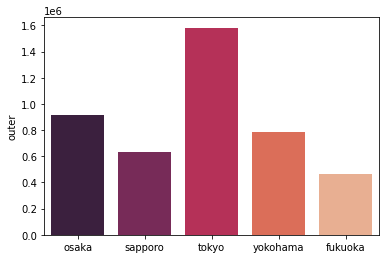

In [45]:
sns.barplot(df_sales_pivot.index,df_sales_pivot['outer'], palette="rocket")

C:\Users\81802\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='outer'>

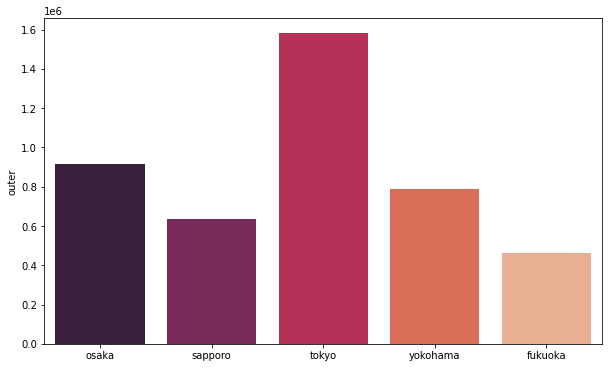

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(df_sales_pivot.index,df_sales_pivot['outer'], palette="rocket")

<AxesSubplot:>

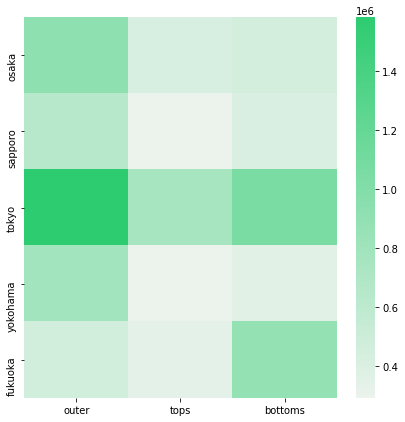

In [49]:
plt.figure(figsize=(7,7))

cmap = sns.light_palette("#2ecc71", as_cmap=True)
sns.heatmap(df_sales_pivot,cmap=cmap)

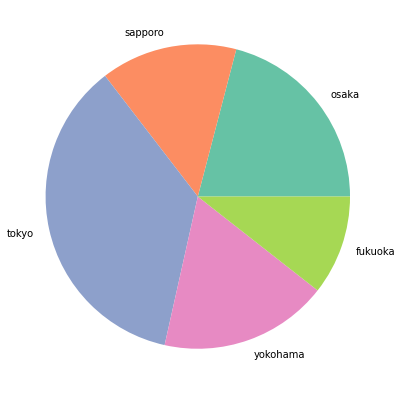

In [53]:
plt.figure(figsize=(7,7))
sns.set_palette('Set2')

plt.pie(df_sales_pivot['outer'],labels=df_sales_pivot.index)

plt.savefig('graph.png',dpi=200)

<Figure size 432x288 with 0 Axes>